In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the images to the range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Flatten the 28x28 images into 784-dimensional vectors
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

import tensorflow as tf

class DendriticLayer(tf.keras.layers.Layer):
    def __init__(self, units=32):
        super(DendriticLayer, self).__init__()
        self.units = units

    def build(self, input_shape):
        self.w1 = self.add_weight(shape=(input_shape[-1], self.units),
                                  initializer='random_normal',
                                  trainable=True)
        self.b1 = self.add_weight(shape=(self.units,),
                                  initializer='random_normal',
                                  trainable=True)
        self.w2 = self.add_weight(shape=(input_shape[-1], self.units),
                                  initializer='random_normal',
                                  trainable=True)
        self.b2 = self.add_weight(shape=(self.units,),
                                  initializer='random_normal',
                                  trainable=True)
        self.w3 = self.add_weight(shape=(input_shape[-1], self.units),
                                  initializer='random_normal',
                                  trainable=True)
        self.b3 = self.add_weight(shape=(self.units,),
                                  initializer='random_normal',
                                  trainable=True)

    def call(self, inputs):
        # Each branch has the same shape after matmul
        branch_1 = tf.sin(tf.matmul(inputs, self.w1) + self.b1) + tf.square(tf.matmul(inputs, self.w1))
        branch_2 = tf.cos(tf.matmul(inputs, self.w2) + self.b2) * tf.tanh(tf.matmul(inputs, self.w2))
        branch_3 = tf.math.log1p(tf.abs(tf.matmul(inputs, self.w3) + self.b3)) + tf.exp(-tf.abs(tf.matmul(inputs, self.w3)))

        # Summing up branches, ensuring the output shape is consistent
        integration = tf.reduce_sum(branch_1 + branch_2 + branch_3, axis=1)
        return tf.expand_dims(integration, axis=-1)

# Example DINN model for MNIST
inputs = tf.keras.Input(shape=(28*28,))
x = DendriticLayer(units=128)(inputs)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
outputs = tf.keras.layers.Dense(10, activation='softmax')(x)

model = tf.keras.Model(inputs, outputs)

In [3]:

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.2100 - loss: 3.1073 - val_accuracy: 0.5041 - val_loss: 1.2974
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.5266 - loss: 1.2185 - val_accuracy: 0.5574 - val_loss: 1.1031
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.6276 - loss: 0.9973 - val_accuracy: 0.6590 - val_loss: 0.9511
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6854 - loss: 0.8749 - val_accuracy: 0.6854 - val_loss: 0.9089
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7143 - loss: 0.8139 - val_accuracy: 0.7196 - val_loss: 0.8519
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7378 - loss: 0.7691 - val_accuracy: 0.7075 - val_loss: 0.8810
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7509 - loss: 0.7366 - val_accuracy: 0.7141 - val_loss: 0.8363
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7660 - loss: 0.7027 - 

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7066 - loss: 0.8782
Test accuracy: 0.7247999906539917
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


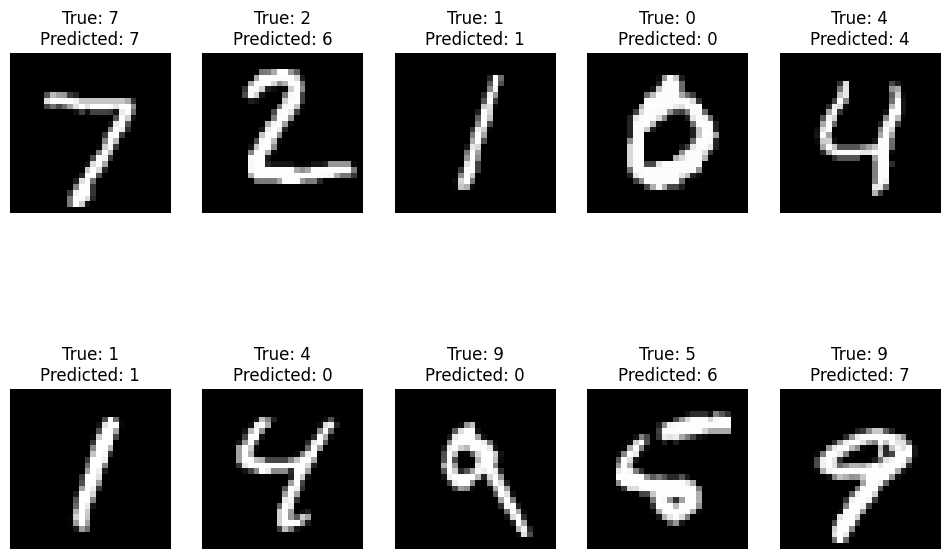

In [4]:

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

# Make predictions on the test set
predictions = model.predict(x_test)
predicted_classes = tf.argmax(predictions, axis=1).numpy()
true_classes = tf.argmax(y_test, axis=1).numpy()


import matplotlib.pyplot as plt

# Function to plot a few examples with predictions
def plot_examples(x_test, true_classes, predicted_classes, num_examples=10):
    plt.figure(figsize=(12, 8))
    for i in range(num_examples):
        plt.subplot(2, 5, i + 1)
        plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
        plt.title(f"True: {true_classes[i]}\nPredicted: {predicted_classes[i]}")
        plt.axis('off')
    plt.show()

# Plot the first 10 examples from the test set
plot_examples(x_test, true_classes, predicted_classes)
